In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:

df = pd.read_excel("2019.xlsx")

In [3]:
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2019,17439,15,15,3533
1,2019,17680,317,15,3519
2,2019,17203,359,40,3543
3,2019,17658,204,30,3544
4,2019,17486,140,36,3537
...,...,...,...,...,...
1883,2019,17431,424,26,3566
1884,2019,17210,379,35,3531
1885,2019,17230,370,41,3511
1886,2019,17095,82,27,3564


In [4]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1888, 5)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1888 non-null   int64
 1   Maximum length (m))  1888 non-null   int64
 2   Recession(m),        1888 non-null   int64
 3   Rate/yr(m)           1888 non-null   int64
 4   Snout altitude (m)   1888 non-null   int64
dtypes: int64(5)
memory usage: 73.9 KB


In [6]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [7]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1888


In [8]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [9]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [10]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2019,17439,15,15,3533
1,2019,17680,317,15,3519
2,2019,17203,359,40,3543
3,2019,17658,204,30,3544
4,2019,17486,140,36,3537


In [11]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,0.0159,-0.0351,-0.0185
"Recession(m),",NaN,0.0159,1.0000,0.0171,-0.0122
Rate/yr(m),NaN,-0.0351,0.0171,1.0000,-0.0030
Snout altitude (m),NaN,-0.0185,-0.0122,-0.0030,1.0000


In [12]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Recession(m),          0.0159
Snout altitude (m)    -0.0185
Rate/yr(m)            -0.0351
Year                      NaN
Name: Maximum length (m)), dtype: float64

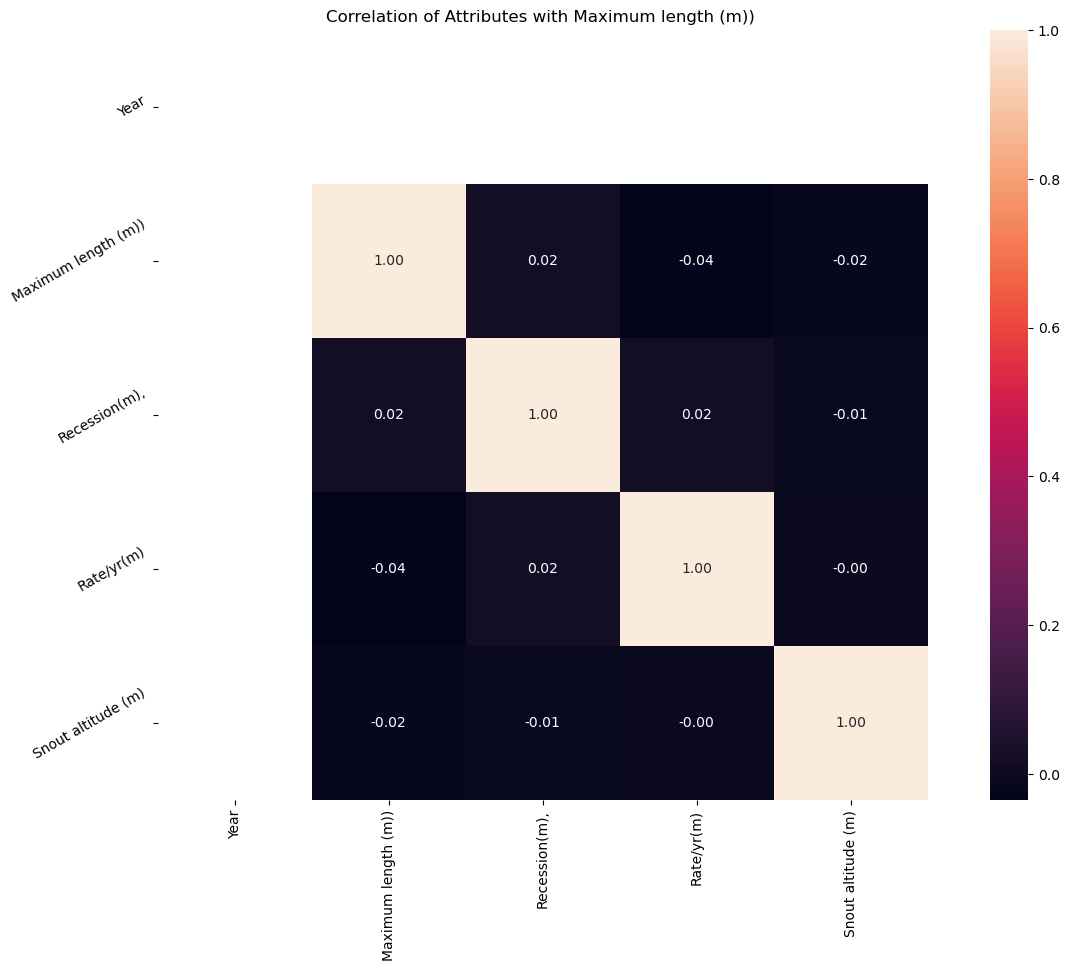

In [13]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [14]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [15]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,888.0000","1,888.0000","1,888.0000","1,888.0000","1,888.0000"
mean,"2,019.0000","17,558.5429",215.9015,27.3252,"3,531.6367"
std,0.0000,294.4324,130.0306,8.4838,20.3564
min,"2,019.0000","17,035.0000",0.0000,13.0000,"3,496.0000"
25%,"2,019.0000","17,310.7500",102.0000,20.0000,"3,514.0000"
50%,"2,019.0000","17,562.5000",214.0000,27.0000,"3,531.0000"
75%,"2,019.0000","17,811.0000",330.2500,35.0000,"3,549.2500"
max,"2,019.0000","18,067.0000",440.0000,42.0000,"3,567.0000"


In [16]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

2019   1.0000
Name: Year, dtype: float64

335   0.0069
318   0.0064
15    0.0058
398   0.0058
39    0.0058
       ...  
192   0.0005
336   0.0005
252   0.0005
396   0.0005
97    0.0005
Name: Recession(m),, Length: 433, dtype: float64

29   0.0424
24   0.0413
19   0.0387
31   0.0381
28   0.0376
35   0.0376
17   0.0365
21   0.0360
26   0.0360
32   0.0355
25   0.0344
20   0.0344
15   0.0339
18   0.0334
34   0.0328
42   0.0323
33   0.0318
36   0.0312
13   0.0312
40   0.0307
41   0.0302
27   0.0302
14   0.0302
37   0.0302
39   0.0302
16   0.0297
22   0.0297
23   0.0291
38   0.0281
30   0.0265
Name: Rate/yr(m), dtype: float64

3526   0.0212
3525   0.0212
3523   0.0196
3524   0.0196
3553   0.0185
        ...  
3515   0.0101
3554   0.0095
3558   0.0090
3522   0.0090
3496   0.0016
Name: Snout altitude (m), Length: 72, dtype: float64



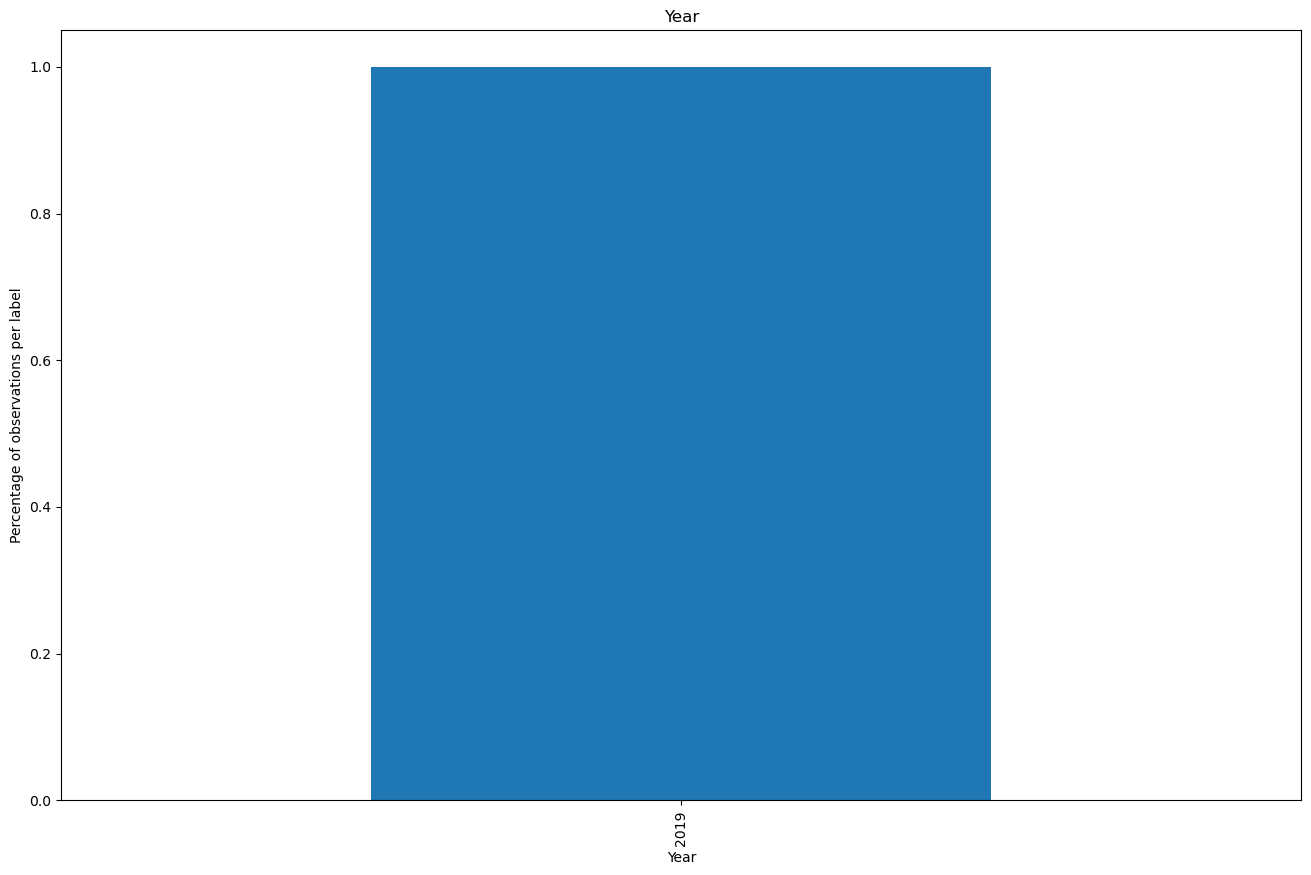

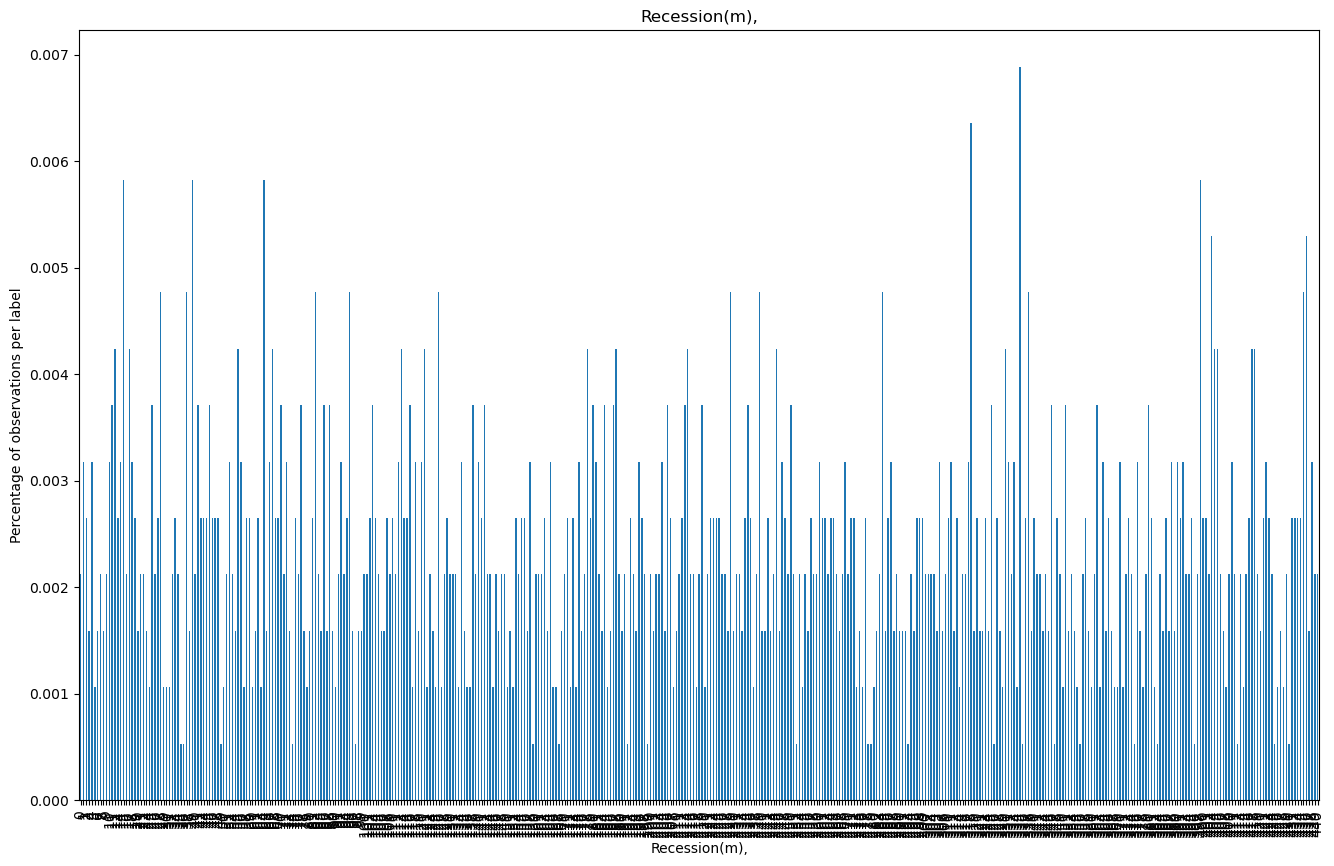

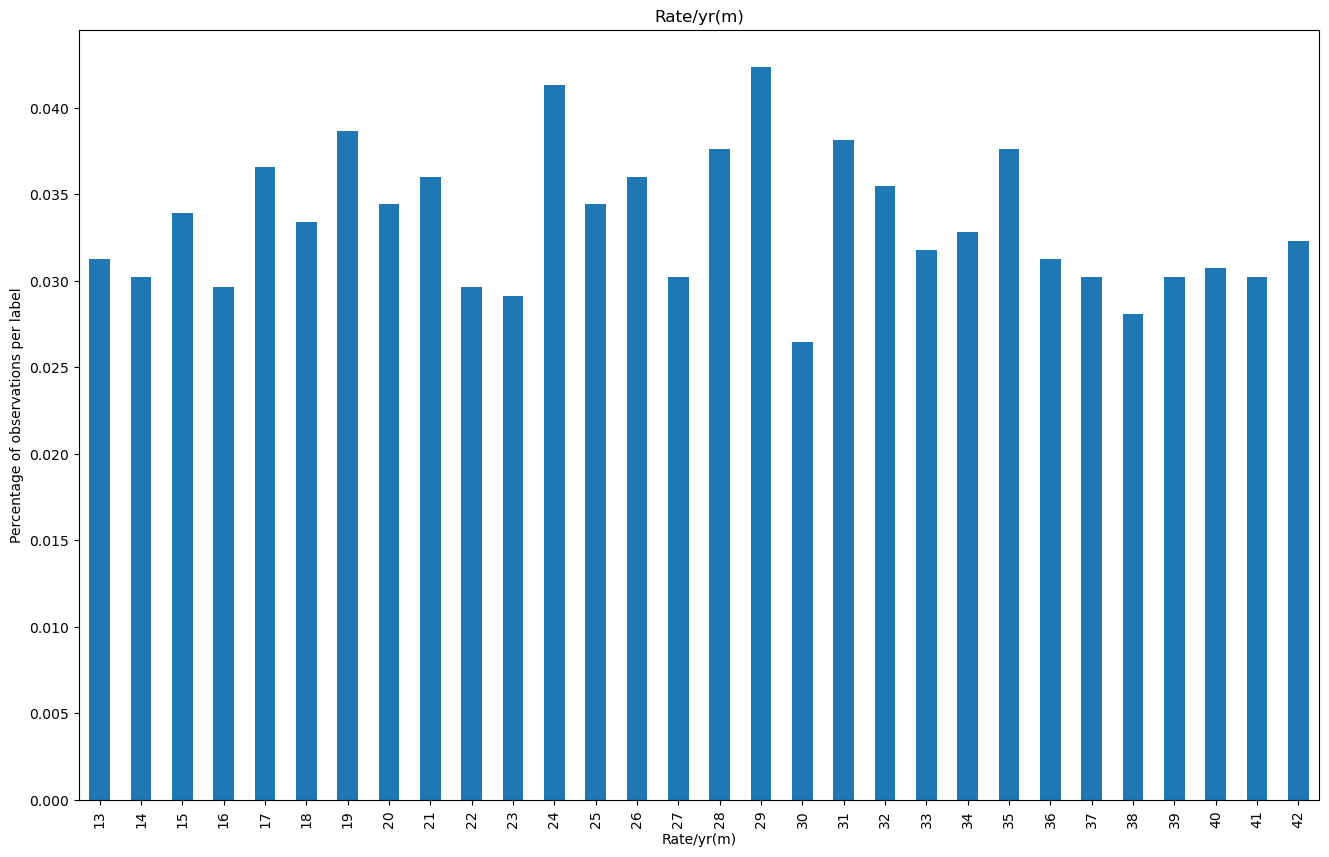

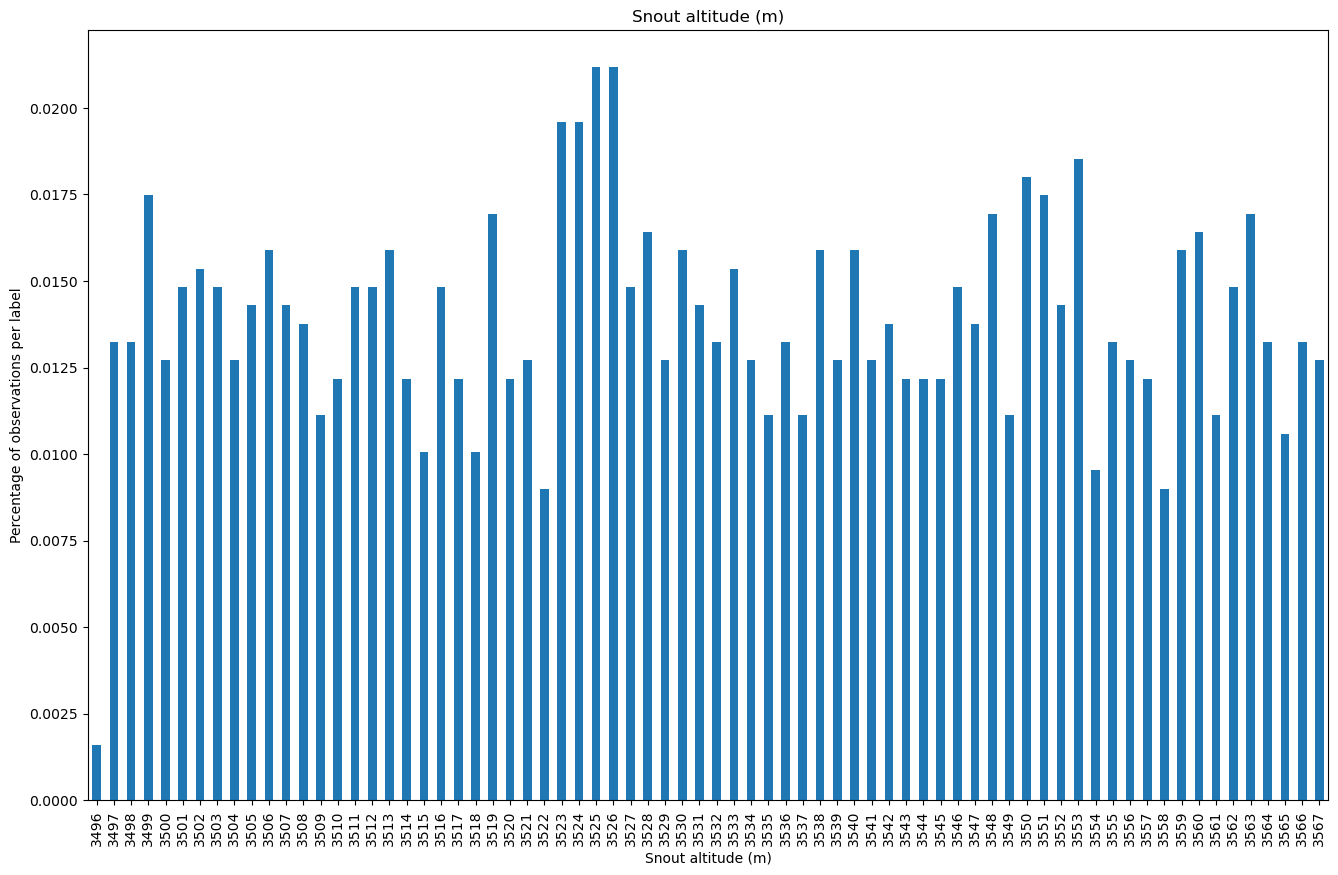

In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()